In [30]:
import fxcmpy
import pandas as pd
import datetime as dt
from pylab import plt
from PIL import Image
import numpy as np
import time
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn')
%matplotlib inline

In [8]:
con = fxcmpy.fxcmpy(config_file='fxcm.cfg', log_level='error', server='real')

In [20]:
eurusd1min = con.get_candles('EUR/USD', period='m1', number=2000)
start = dt.datetime(2019, 5, 21)
stop = dt.datetime(2019, 5, 22)
eurusd1min21 = con.get_candles('EUR/USD', period='m1',
                start=start, stop=stop)

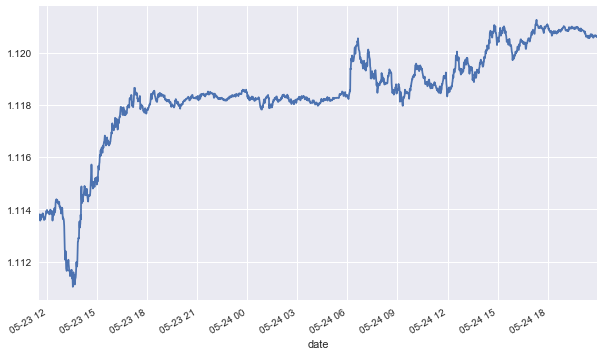

In [17]:
eurusd1min['askclose'].plot(figsize=(10, 6));
plt.savefig("img.png")

In [11]:
eurusd1min.to_excel('eurusd1min.xlsx')

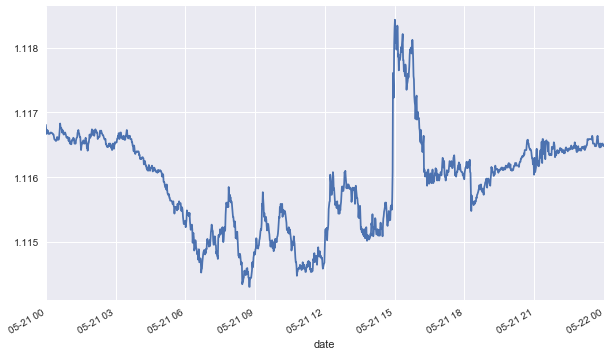

In [21]:
eurusd1min21['askclose'].plot(figsize=(10, 6));
plt.savefig("img21.png")


In [39]:
eurusd1min.columns

Index(['bidopen', 'bidclose', 'bidhigh', 'bidlow', 'askopen', 'askclose',
       'askhigh', 'asklow', 'tickqty'],
      dtype='object')

In [42]:
data = eurusd1min[['bidopen', 'bidclose', 'bidhigh', 'bidlow', 'askopen', 'askclose',
       'askhigh', 'asklow', 'tickqty']]


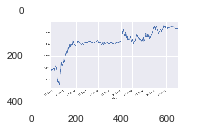

In [43]:
i = Image.open('img.png')
iar = np.array(i)
fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=4, colspan=3)


ax1.imshow(iar)



plt.show()

In [44]:
def createExamples():
    numberArrayExamples = open('numArEx.txt','a')
    numbersWeHave = range(1,10)
    for eachNum in numbersWeHave:
        #print eachNum
        for furtherNum in numbersWeHave:
            # you could also literally add it *.1 and have it create
            # an actual float, but, since in the end we are going
            # to use it as a string, this way will work.
            print(str(eachNum)+'.'+str(furtherNum))
            imgFilePath = 'images/numbers/'+str(eachNum)+'.'+str(furtherNum)+'.png'
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiarl = str(eiar.tolist())

            print(eiarl)
            lineToWrite = str(eachNum)+'::'+eiarl+'\n'
            numberArrayExamples.write(lineToWrite)

In [45]:
def threshold(imageArray):

    balanceAr = []
    newAr = imageArray
    from statistics import mean
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = mean(eachPix[:3])
            balanceAr.append(avgNum)

    balance = mean(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if mean(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr

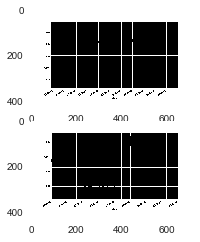

In [46]:
i = Image.open('img.png')
iar = np.array(i)
i2 = Image.open('img21.png')
iar2 = np.array(i2)



iar = threshold(iar)
iar2 = threshold(iar2)

fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8,6),(4,0), rowspan=4, colspan=3)


ax1.imshow(iar)
ax2.imshow(iar2)



plt.show()